In [2]:
import pandas
import numpy as np
from tqdm import tqdm_notebook
import copy
from matplotlib import pylab as plt
%matplotlib inline

In [16]:
start = (0,0)
finish = (10,10)
points = np.array([(3,6),(7,9),(0,6),(3,7),(8,5),(2,6),(5,5),(1,4),(1,9),(8,2),(5,2)])
m = (start,finish,points)
all_points = np.concatenate(([start],points,[finish]))

In [56]:
#vibor 1 4- 17
start = [1029, -1086,1,4]
points = np.array([(1414, -1135),(947, -1404),(1272, -1403),(1598, -1372),(1937, -1442),(1126, -1721),(1484, -1649),(1298, -2003),(1624, -1804),(1814, -1781),(1672, -2133),(1936, -2014)])
points = np.hstack([points,np.array([(1,5+i) for i in range(points.shape[0])]) ])
finish = [2135, -1708,1,17]

In [69]:
#vibor sk-28
start = [771, 270,1,'sk']
points = np.array([(609, 842),(930, 752),(1375, 664),(316, 1228),(717, 1348),(959, 1020),(1351, 1086),(1268, 1245),(1047, 1518)])
points = np.hstack([points,np.array([(1,19+i) for i in range(points.shape[0])]) ])
finish = [1145, 1943,1,'28']
all_points = f1 = np.concatenate(([start],points,[finish]))

In [28]:
#vibor 40-53

start = [138, -120,1,"40"]
all_points = np.array([[271, -902, 1, "41"], [544, -585, 1, "42"], [710, -402, 1, "43"], [1080, -263, 1, "44"], [505, -1290, 1, "45"], [654, -960, 1, "46"], [893, -706, 1, "47"], [1164, -593, 1, "48"], [890, -1243, 1, "49"], [1171, -940, 1, "50"], [1124, -1529, 1, "51"], [1368, -1214, 1, "52"]])
finish = [1540, -1694,1,"53"]
factor = 0.003401360544217687

In [79]:
#vibor 3 32 - pf
start = [1814, 1332, 1, "32"]
points =  np.array([[1490, 1476, 1, "33"], [1612, 1739, 1, "35"], [1210, 1493, 1, "35'"], [946, 1637, 1, "36"], [1606, 2043, 1, "36'"], [1098, 1922, 1, "34"], [1268, 2034, 1, "34'"], [1290, 2284, 1, "37"], [868, 2030, 1, "37'"]])
finish = [574, 1902, 1, "pf"]
all_points = f1 = np.concatenate(([start],points,[finish]))

In [80]:
def route_dist(route):
    dist = start_distances[route[0]]
    for p1,p2 in zip(route[:-1],route[1:]):
        dist += distance_matrix[p1,p2]
    return dist + finish_distances[route[-1]]

def distance(x,y):
    return np.sqrt((float(x[0])-float(y[0]))**2  + (float(x[1])-float(y[1]))**2)


In [5]:
routes_to_find = 5
top = []
porog = 1e20
def register_top(route,dist):
    global top
    global routes_to_find
    global porog
    top.append((points[route],dist))
    top = sorted(top,key = lambda x: x[1])[:routes_to_find]
    #print 'new top'
    try:
        last = top[routes_to_find-1]
        #print 'porog changed'
        porog = last[1]
    except:
        pass

In [23]:
# b = None
# def best_route(route):
#     if len(route) == len(points):
#         return (route,route_dist(route))
#     best_ret = None
#     for i in range(len(points)):
#         if i in route:
#             continue
#         new_route = copy.copy(route)
#         new_route.append(i)
#         #print new_route
#         best = best_route(new_route)
#         if best_ret is None:
#             best_ret = best
#         else:
#             if best_ret[1]>best[1]:
#                 best_ret = best
#     return best_ret
    

In [58]:
def best_route(route,dist):
    current = route[-1]
    if dist+finish_distances[current]>porog:
        return
    if len(route) == len(points):
        register_top(route,dist+finish_distances[current])
    for i in range(len(points)):
        if i in route:
            continue
        new_route = copy.copy(route)
        new_route.append(i)
        new_dist = dist+distance_matrix[current,i]
        if new_dist>porog:
            continue
        best = best_route(new_route,new_dist)

In [81]:
distance_matrix = np.array([[distance(x,y) for x in points] for y in points])
start_distances = np.array([distance(start,x) for x in points])
finish_distances = np.array([distance(finish,x) for x in points])

top = []
porog=1e20
for first in tqdm_notebook(range(len(points))):
    b = best_route([first],start_distances[first])


HBox(children=(IntProgress(value=0, max=9), HTML(value=u'')))

In [82]:
best = top[0][1]
for t in top:
    print np.concatenate([[start],t[0],[finish]])[:,3],\
        '%.3f км'%(t[1]*factor),\
        '(-%.3f,'%((t[1]-best)*factor),\
        '%.2f%%)' % ((t[1]-best)*100./best)

['32' '33' '35' "36'" '37' "34'" '34' "35'" '36' "37'" 'pf'] 11.109 км (-0.000, 0.00%)
['32' '33' "35'" '35' "36'" '37' "34'" '34' '36' "37'" 'pf'] 11.247 км (-0.139, 1.25%)
['32' '33' '35' "36'" '37' "34'" "35'" '36' '34' "37'" 'pf'] 11.359 км (-0.250, 2.25%)
['32' '33' "35'" '36' '35' "36'" '37' "34'" '34' "37'" 'pf'] 11.362 км (-0.253, 2.28%)
['32' '33' "35'" '35' "36'" '37' "34'" '34' "37'" '36' 'pf'] 11.476 км (-0.367, 3.31%)
['32' '33' '35' "36'" '37' "34'" '34' '36' "35'" "37'" 'pf'] 11.502 км (-0.393, 3.54%)
['32' "35'" '33' '35' "36'" '37' "34'" '34' '36' "37'" 'pf'] 11.551 км (-0.442, 3.98%)
['32' '35' '33' "35'" '36' '34' "34'" "36'" '37' "37'" 'pf'] 11.567 км (-0.459, 4.13%)
['32' '33' '35' "36'" "34'" '37' '34' "35'" '36' "37'" 'pf'] 11.608 км (-0.500, 4.50%)
['32' '33' '36' "35'" '35' "36'" '37' "34'" '34' "37'" 'pf'] 11.649 км (-0.540, 4.86%)


In [ ]:
#1 - [ 6, 10, 12, 15, 16, 14, 13, 11,  7,  5,  8,  9]
#2 - [19, 22, 23, 24, 20, 21, 25, 26, 27]
#3 - [(]33 35 36' 37 34' 34 35' 36 37']
#4 - [42 43 44 48 47 46 41 45 49 51]

In [32]:
def plot(route):
    f1 = np.concatenate(([start],points[route]))
    f2 = np.concatenate((points[route],[finish]))
    for p1,p2 in zip(f1,f2):
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]])

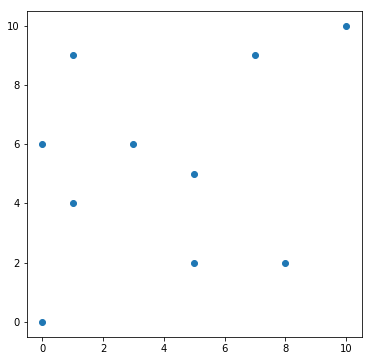

In [184]:
plt.figure(figsize=(6,6))
plt.scatter(all_points[:,0],all_points[:,1])

([1, 5, 7, 10, 11, 9, 8, 6, 2, 0, 3, 4], 3977.3915758864823)
([0, 2, 1, 5, 7, 10, 11, 9, 8, 6, 3, 4], 4036.8501752290699)


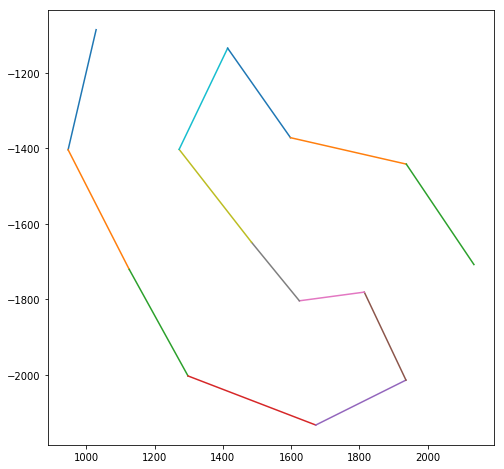

In [34]:
plt.figure(figsize=(8,8))

print top[0]
print top[1]
plot(top[0][0])
#print np.array(best[0]) + 19

In [ ]:
(33 35 36' 37 34' 34 35' 36 37')

# Для КП, которые можно пропустить

In [8]:
import itertools

In [41]:
all_best = []
top = []
porog=1e20
routes_to_find = 10

for combination in tqdm_notebook(itertools.combinations(range(1,12,1),9),total=55):
    points_ind = np.concatenate(([0],combination))
    points = all_points[points_ind]
    distance_matrix = np.array([[distance(x,y) for x in points] for y in points])
    start_distances = np.array([distance(start,x) for x in points])
    finish_distances = np.array([distance(finish,x) for x in points])
    for first in range(len(points)):
        b = best_route([first],start_distances[first])   
    
#print top

HBox(children=(IntProgress(value=0, max=55), HTML(value=u'')))

In [46]:
best = top[0][1]
for t in top:
    print np.concatenate([[start],t[0],[finish]])[:,3],\
        (list(set(all_points[:,3]) - set(t[0][:,3]))),\
        '%.3f км'%(t[1]*factor),\
        '(-%.3f,'%((t[1]-best)*factor),\
        '%.2f%%)' % ((t[1]-best)*100./best)

['40' '42' '43' '44' '48' '47' '46' '41' '45' '49' '51' '53'] ['50', '52'] 14.585 км (-0.000, 0.00%)
['40' '43' '42' '41' '45' '46' '47' '48' '50' '52' '51' '53'] ['44', '49'] 14.596 км (-0.011, 0.08%)
['40' '43' '42' '41' '46' '47' '48' '50' '52' '49' '51' '53'] ['44', '45'] 14.671 км (-0.087, 0.59%)
['40' '43' '42' '41' '45' '46' '47' '48' '50' '49' '51' '53'] ['44', '52'] 14.755 км (-0.171, 1.17%)
['40' '43' '42' '41' '45' '49' '46' '47' '48' '50' '52' '53'] ['44', '51'] 14.794 км (-0.209, 1.43%)
['40' '43' '42' '41' '46' '47' '48' '50' '49' '51' '52' '53'] ['44', '45'] 14.868 км (-0.283, 1.94%)
['40' '43' '42' '41' '46' '47' '44' '48' '50' '52' '51' '53'] ['45', '49'] 14.936 км (-0.351, 2.41%)
['40' '42' '41' '46' '47' '43' '44' '48' '50' '52' '51' '53'] ['45', '49'] 14.942 км (-0.357, 2.45%)
['40' '42' '43' '47' '46' '41' '45' '49' '50' '52' '51' '53'] ['44', '48'] 14.942 км (-0.357, 2.45%)
['40' '41' '46' '42' '43' '44' '48' '47' '50' '52' '51' '53'] ['45', '49'] 14.948 км (-0.36

In [14]:
for t in top:
    print t[0][:,3],t[1]*factor

['41' '46' '42' '43' '44' '48' '47' '50' '52' '51'] 14.9478693608
['41' '42' '43' '44' '48' '47' '46' '45' '49' '51'] 14.9789095237
['41' '46' '47' '42' '43' '44' '48' '50' '52' '51'] 15.0071454921
['41' '45' '46' '42' '43' '47' '48' '50' '52' '51'] 15.0518479546
['41' '42' '43' '44' '48' '50' '47' '46' '49' '51'] 15.0992547968
['41' '46' '42' '43' '44' '48' '47' '50' '49' '51'] 15.1072433171
['41' '46' '42' '43' '47' '48' '50' '52' '49' '51'] 15.1271802326
